# Handling missing values

 
# Here are the applied stpes:
    
1- dropping useless columns ['id', 'url', 'region_url', 'county', 'size', 'image_url', 'description']

2- dropping useless rows where nulls cann't be populated

3- populating related columns on each others

    'manufacturer' & 'model'
    
4- populating 

    ['type' , 'drive'] on 'model'
    
    'cylinders' on 'type'
    
    'condition' on 'year'
    
5- filling columns with small number of nulls with mode or mean values

    ['Fuel', 'title_status', 'transmission', 'odometer']
    
6- fill missing 'paint_color' with 'custom'
    
7- removing outliers & nulls from the 'year' column

8- convert the 'VIN' to a binary column (0,1)

9- dropping nulls from ['lat', 'long'] 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# uploading the dataset
data = pd.read_csv(r"C:\Users\m\Downloads\excel files\vehicles.csv")

In [3]:
data.shape

(426880, 26)

In [4]:
# it took a lot of time to work with the 400k rows of data so 100K would be more effective

df = data.sample(100000)

# Overview

In [5]:
# displaying top 5 rows
pd.set_option('display.max_column', None)
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
22258,7310944240,https://bakersfield.craigslist.org/ctd/d/victo...,bakersfield,https://bakersfield.craigslist.org,0,2018.0,hyundai,accent,NaN,NaN,gas,55985.0,clean,automatic,3KPC24A33JE006049,fwd,full-size,sedan,silver,https://images.craigslist.org/00R0R_ddPDQlpJ42...,Vehicle DescriptionStand out from the crowd wi...,NaN,ca,34.480200,-117.408200,2021-04-22T10:52:45-0700
54839,7316466087,https://sandiego.craigslist.org/csd/cto/d/ocea...,san diego,https://sandiego.craigslist.org,4000,2001.0,jeep,grand cherokee,excellent,NaN,gas,200000.0,clean,automatic,NaN,NaN,NaN,SUV,NaN,https://images.craigslist.org/00U0U_hSDeLFWkjS...,2001 grand jeep Cherokee limited edition 1 own...,NaN,ca,33.240700,-117.302500,2021-05-03T15:13:59-0700
324826,7306374552,https://roseburg.craigslist.org/ctd/d/portland...,roseburg,https://roseburg.craigslist.org,21997,2007.0,toyota,4runner sport edition 4dr suv 1-oregon owner*r...,NaN,6 cylinders,gas,171525.0,clean,automatic,JTEBU14RX78083407,4wd,NaN,SUV,white,https://images.craigslist.org/00707_eBzUkauPsA...,UP FOR GRABS IS A SUPER HARD TO FIND IN THIS S...,NaN,or,45.547200,-122.500100,2021-04-13T14:02:03-0700
7583,7303306508,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,https://anchorage.craigslist.org,9999,2010.0,subaru,impreza,NaN,4 cylinders,gas,119750.0,clean,automatic,JF1GH6B68AH823506,NaN,NaN,wagon,silver,https://images.craigslist.org/00b0b_cZeQBVyrdg...,This Subaru Impreza can be yours today!We have...,NaN,ak,61.211600,-149.876100,2021-04-07T12:04:14-0800
312203,7312338567,https://bend.craigslist.org/ctd/d/gladstone-19...,bend,https://bend.craigslist.org,26990,1999.0,ford,f-350,NaN,NaN,diesel,181510.0,clean,automatic,1FTSW31F8XEA70757,4wd,NaN,pickup,blue,https://images.craigslist.org/00V0V_esUuhje1HE...,1999 Ford F-350 F350 F 350 Super Duty XLT Crew...,NaN,or,45.382346,-122.605132,2021-04-25T08:32:45-0700


In [6]:
# checking data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 22258 to 377576
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            100000 non-null  int64  
 1   url           100000 non-null  object 
 2   region        100000 non-null  object 
 3   region_url    100000 non-null  object 
 4   price         100000 non-null  int64  
 5   year          99717 non-null   float64
 6   manufacturer  95890 non-null   object 
 7   model         98740 non-null   object 
 8   condition     59388 non-null   object 
 9   cylinders     58684 non-null   object 
 10  fuel          99293 non-null   object 
 11  odometer      98985 non-null   float64
 12  title_status  98058 non-null   object 
 13  transmission  99413 non-null   object 
 14  VIN           62435 non-null   object 
 15  drive         69502 non-null   object 
 16  size          28510 non-null   object 
 17  type          78425 non-null   object 
 18  paint

In [7]:
# calculating nulls percentage per each column
(df.isnull().sum()/len(df)) * 100

id                0.000
url               0.000
region            0.000
region_url        0.000
price             0.000
year              0.283
manufacturer      4.110
model             1.260
condition        40.612
cylinders        41.316
fuel              0.707
odometer          1.015
title_status      1.942
transmission      0.587
VIN              37.565
drive            30.498
size             71.490
type             21.575
paint_color      30.329
image_url         0.015
description       0.015
county          100.000
state             0.000
lat               1.522
long              1.522
posting_date      0.015
dtype: float64

In [8]:
# exploring unique values
df.nunique()

id              100000
url             100000
region             404
region_url         413
price             8128
year               107
manufacturer        42
model            13750
condition            6
cylinders            8
fuel                 5
odometer         45291
title_status         6
transmission         3
VIN              41766
drive                3
size                 4
type                13
paint_color         12
image_url        74277
description      92668
county               0
state               51
lat              22158
long             22339
posting_date     97013
dtype: int64

In [9]:
# displaying unique values
categorical_columns = df[['condition', 'cylinders', 'fuel', 'title_status',
                          'transmission', 'drive', 'type', 'paint_color']]

for column in categorical_columns:
    print(column, ': \n' , df[column].unique(), '\n')

condition : 
 [nan 'excellent' 'good' 'like new' 'fair' 'new' 'salvage'] 

cylinders : 
 [nan '6 cylinders' '4 cylinders' '8 cylinders' '3 cylinders' 'other'
 '12 cylinders' '5 cylinders' '10 cylinders'] 

fuel : 
 ['gas' 'diesel' 'electric' 'other' 'hybrid' nan] 

title_status : 
 ['clean' nan 'salvage' 'rebuilt' 'lien' 'missing' 'parts only'] 

transmission : 
 ['automatic' 'manual' 'other' nan] 

drive : 
 ['fwd' nan '4wd' 'rwd'] 

type : 
 ['sedan' 'SUV' 'wagon' 'pickup' 'coupe' 'hatchback' nan 'truck' 'other'
 'mini-van' 'convertible' 'van' 'offroad' 'bus'] 

paint_color : 
 ['silver' nan 'white' 'blue' 'red' 'black' 'custom' 'brown' 'grey' 'green'
 'purple' 'orange' 'yellow'] 



# Deleting useless rows & columns

In [10]:
# useless columns
df.drop(['id', 'url', 'region_url', 'county', 'size', 'image_url', 'description'], axis = 1, inplace = True)

In [11]:
# cars with no manufacturer or model
df.dropna(subset = ['manufacturer', 'model'], how = 'all', inplace = True)

In [12]:
# cars with no features
df.dropna(subset = ['condition','cylinders','fuel',
                    'odometer','title_status','transmission',
                    'drive','type'], how = 'all', inplace = True)

In [13]:
# new shape
df.shape

(99868, 19)

In [14]:
# existing columns
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'type', 'paint_color', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

# Manufacturer & Model

In [ ]:
# populating 'manufacturer' with the mode value per each 'model'

In [15]:
# models' list
models = df['model'].dropna().unique()

# empty lists to save the results
manufacturer_list = []
model_list = []
models_null_manufacturer = []

for model in models:
    # manufacturer mode value
    mode_value = df[df['model'] == model]['manufacturer'].mode()
    
    if not mode_value.empty:
        
        # assining values to the lists
        model_list.append(model)
        manufacturer_list.append(mode_value.iloc[0])
    else:
        # models with no mode value
        models_null_manufacturer.append(model)
        
# displaying the length of each list    
print(len(model_list), len(manufacturer_list), len(models_null_manufacturer)) 

11745 11745 2004


In [16]:
# filling nulls with the mode value per each 'model'
for i in range(min(len(model_list), len(manufacturer_list))):
    
    df.loc[(df['manufacturer'].isnull()) & (df['model'] == model_list[i]), 'manufacturer'] = manufacturer_list[i]

In [17]:
# models_null_manufacturer

# sum of null values
print(df['manufacturer'].isnull().sum(), '\n')
# number of models with null values in the manufacturer column
print(len(df[df['model'].isin(models_null_manufacturer)]))

3937 

3937


In [18]:
# filling remaining nulls with 'unknown'
df['manufacturer'] = df['manufacturer'].fillna('unknown')

In [19]:
# checking
df['manufacturer'].isnull().sum()

0

In [ ]:
# the same process for 'model'

In [21]:
# manufacturers list
manufacturers = df['manufacturer'].dropna().unique()

# empty lists to save the result
manufacturer_list1 = []
model_list1 = []
manufacturer_null_model = []

for manufacturer in manufacturers:
    # model mode value
    mode_value = df[df['manufacturer'] == manufacturer]['model'].mode()
    
    if not mode_value.empty:
        # assining values to the lists
        model_list1.append(mode_value.iloc[0])
        manufacturer_list1.append(manufacturer)
    else:
        # manufacturers with no mode value
        manufacturer_null_model.append(manufacturer)
    
# displaying the length of each list        
print(len(model_list1), len(manufacturer_list1), len(manufacturer_null_model)) 

42 42 1


In [22]:
# filling nulls with the mode value per each 'manufacturer'
for i in range(min(len(model_list1), len(manufacturer_list1))):
    df.loc[(df['model'].isnull()) & (df['manufacturer'] == manufacturer_list1[i]), 'model'] = model_list1[i]

In [24]:
# filling remaining nulls with 'unknown'
df['model'] = df['model'].fillna('unknown')

In [25]:
# checking
df['model'].isnull().sum()

0

# Type on 'model'

In [26]:
# displaying unique values
df['type'].unique()

array(['sedan', 'SUV', 'wagon', 'pickup', 'coupe', 'hatchback', nan,
       'truck', 'other', 'mini-van', 'convertible', 'van', 'offroad',
       'bus'], dtype=object)

In [27]:
# empty lists to save the result
typ = []
model_type = []
models_null_type = []

for model in models:
    # manufacturer mode value
    mode_value = df[df['model'] == model]['type'].mode()
    
    if not mode_value.empty:
        
        # assining values to the lists
        model_type.append(model)
        typ.append(mode_value.iloc[0])
    else:
        # models with no mode value
        models_null_type.append(model)
        
# displaying the length of each list        
print(len(model_type), len(typ), len(models_null_type))  

11547 11547 2202


In [28]:
# filling nulls with the mode value per each 'model'
for i in range(min(len(model_type), len(typ))):
    
    df.loc[(df['type'].isnull()) & (df['model'] == model_type[i]), 'type'] = typ[i]

In [29]:
# filling remaining nulls with 'other'
df['type'].fillna('other', inplace = True)

In [30]:
# checking
df['type'].isnull().sum()

0

# Drive on 'model'

In [31]:
df['drive'].unique()

array(['fwd', nan, '4wd', 'rwd'], dtype=object)

In [32]:
# empty lists to save the result
drive = []
model_drive = []
models_null_drive = []

for model in models:
    # manufacturer mode value
    mode_value = df[df['model'] == model]['drive'].mode()
    
    if not mode_value.empty:
        
        # assining values to the lists
        model_drive.append(model)
        drive.append(mode_value.iloc[0])
    else:
        # models with no mode value
        models_null_drive.append(model)
        
# displaying the length of each list        
print(len(model_drive), len(drive), len(models_null_drive))

10677 10677 3072


In [33]:
# filling nulls with the mode value per each 'model' 
for i in range(min(len(model_drive), len(drive))):
    df.loc[(df['drive'].isnull()) & (df['model'] == model_drive[i]), 'drive'] = drive[i]

In [34]:
# filling remaining nulls with the mode of the entire column
df['drive'].fillna(df['drive'].mode().iloc[0], inplace = True)

In [35]:
# checking
df['drive'].isnull().sum()

0

# Cylinders on 'Type'

In [ ]:
# populating number of cylinders besed on the vehicle type

In [36]:
vehicle_types = df['type'].unique()

types = []
cylinders = []
empty = []

for t in vehicle_types:
    cylinder_mode = df[df['type'] == t]['cylinders'].mode()
    
    if not cylinder_mode.empty:
        types.append(t)
        cylinders.append(cylinder_mode.iloc[0])
    else:
        # types with no mode value
        empty.append(t)
print(len(types), len(cylinders), len(empty))

13 13 0


In [37]:
# filling nulls based on the vehicels 'type'
for i in range(min(len(types), len(cylinders))):
    df.loc[(df['cylinders'].isnull()) & (df['type'] == types[i]), 'cylinders'] = cylinders[i]

In [38]:
# checking 
df['cylinders'].isnull().sum()

0

In [39]:
df['cylinders'].unique()

array(['4 cylinders', '6 cylinders', '8 cylinders', '3 cylinders',
       'other', '12 cylinders', '5 cylinders', '10 cylinders'],
      dtype=object)

# Year

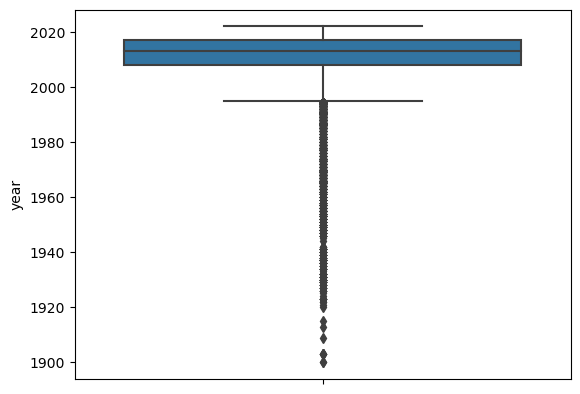

In [40]:
sns.boxplot(y = df['year'])
plt.show()

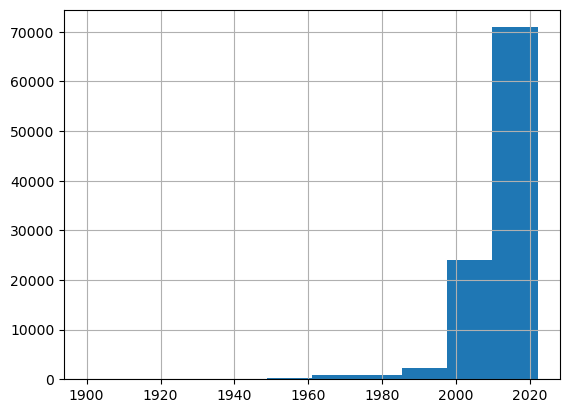

In [41]:
df['year'].hist()
plt.show()

In [42]:
# dropping rows with null years (small number of rows)
df['year'].dropna(inplace = True)

In [43]:
# removing outdated cars
df = df[df['year']>=2000]

# Condition

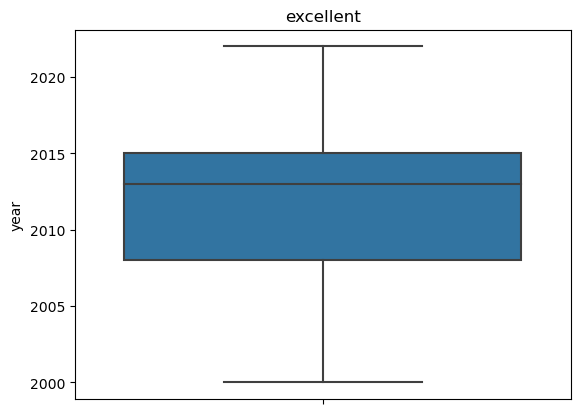

count    22612.000000
mean      2011.810057
std          4.709617
min       2000.000000
25%       2008.000000
50%       2013.000000
75%       2015.000000
max       2022.000000
Name: year, dtype: float64 



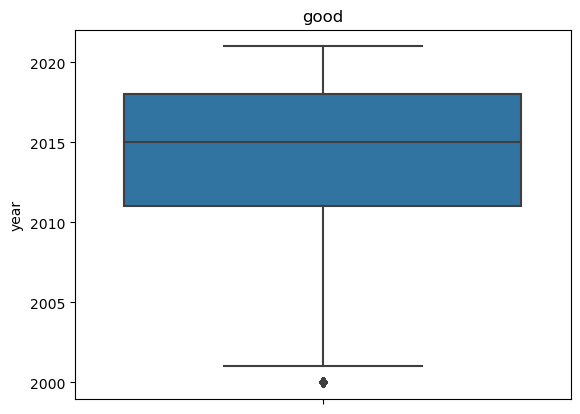

count    26480.000000
mean      2013.750869
std          5.273707
min       2000.000000
25%       2011.000000
50%       2015.000000
75%       2018.000000
max       2021.000000
Name: year, dtype: float64 



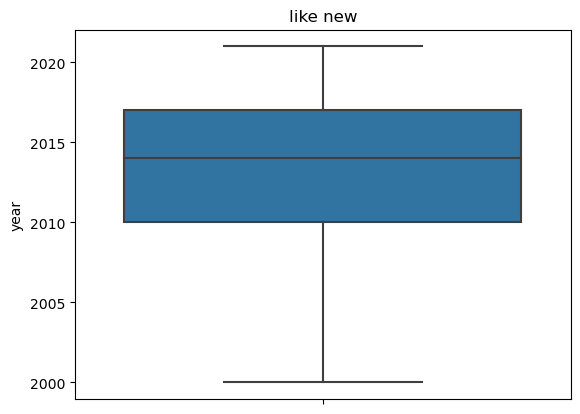

count    4635.000000
mean     2013.212298
std         4.861196
min      2000.000000
25%      2010.000000
50%      2014.000000
75%      2017.000000
max      2021.000000
Name: year, dtype: float64 



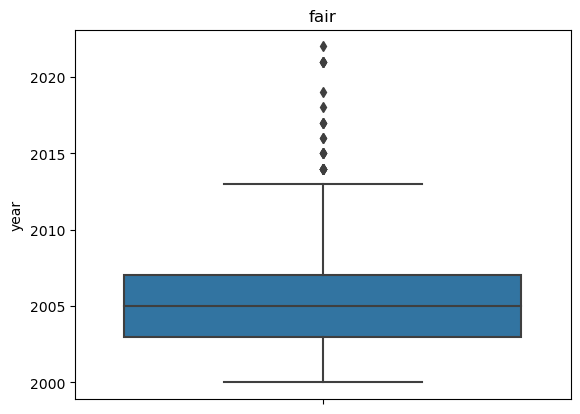

count     977.000000
mean     2005.298874
std         3.595125
min      2000.000000
25%      2003.000000
50%      2005.000000
75%      2007.000000
max      2022.000000
Name: year, dtype: float64 



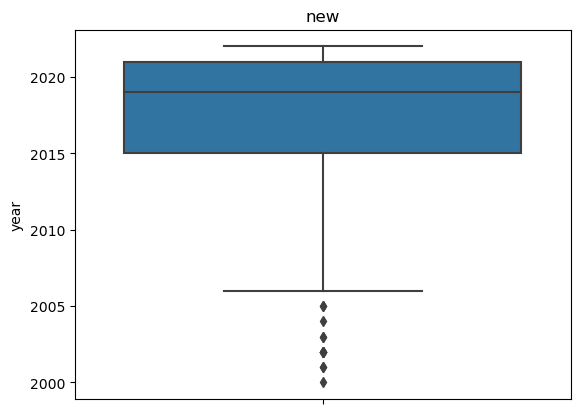

count     286.000000
mean     2017.055944
std         5.055865
min      2000.000000
25%      2015.000000
50%      2019.000000
75%      2021.000000
max      2022.000000
Name: year, dtype: float64 



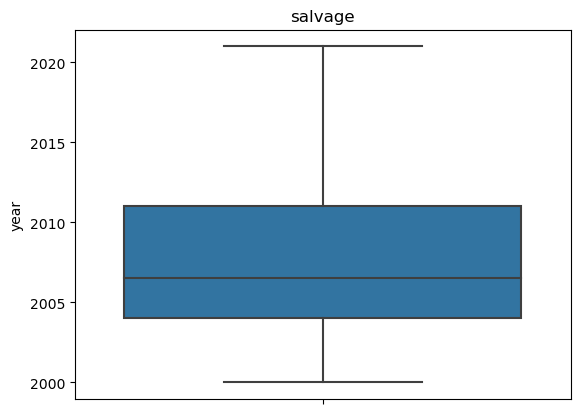

count     112.000000
mean     2007.732143
std         5.355778
min      2000.000000
25%      2004.000000
50%      2006.500000
75%      2011.000000
max      2021.000000
Name: year, dtype: float64 



In [45]:
# discovering the distribution of each 'condition' over 'years'
for cond in df['condition'].dropna().unique():
    
    sns.boxplot(y = df['year'][df['condition'] == cond])
    plt.title(cond)
    plt.show()
    # descriptive stats of each 'condition'
    print(df['year'][df['condition'] == cond].describe(), '\n')
    
    

In [ ]:
# populating the condition with the mode value per each year

In [46]:
# years' list
years = df['year'].unique()

year_list = []
condition_mode = []
empty_years = []

for year in years:
    mode = df[df['year'] == year]['condition'].mode()
    
    if not mode.empty:
        year_list.append(year)
        condition_mode.append(mode.iloc[0])
    else:
        empty_years.append(year)
print(len(year_list), len(condition_mode), len(empty_years))

23 23 0


In [47]:
# filling nulls
for i in range(min(len(year_list), len(condition_mode))):
    df.loc[(df['condition'].isnull()) & (df['year'] == year_list[i]), 'condition'] = condition_mode[i]

In [48]:
# checking
df['condition'].isnull().sum()

0

# Fuel, title_status, transmission, odometer, paint_color

In [49]:
# filling nulls with the mode values 
for column in df[['fuel', 'title_status', 'transmission']]:
    df[column].fillna(df[column].mode().iloc[0], inplace = True)

In [50]:
# filling with mean value
df['odometer'].fillna(df['odometer'].mean(), inplace = True)

In [51]:
# filling with 'custom'
df['paint_color'].fillna('custom', inplace = True)

# VIN

In [ ]:
# making it a binary column

In [52]:
# replacing exsisting VINs with 1
df.loc[df['VIN'].notnull(), 'VIN'] = 1

In [53]:
# filling nulls with 0
df['VIN'].fillna(0, inplace = True)

# Lat & long

In [54]:
df.dropna(inplace = True)

In [55]:
# checking the whole dataset
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [56]:
# Saving the results to a csv file
df.to_csv('used_cars_part1', index = False)